# Student Name: Xin Deng
# Student Number: 11300617

# Loading the dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
retail_df=pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

Dataset details:

This dataset includes transactions from December 1, 2010, to December 9, 2011, for a UK online retailer specializing in unique gifts. Many customers are wholesalers. 

InvoiceNo: Invoice number. If this code starts with letter 'c', it indicates a   cancellation. <br>
StockCode: Product (item) code. <br>
Description: Product (item) name.<br>
Quantity: The quantities of each product (item) per transaction.<br>
InvoiceDate: Invoice Date and time. The day and time when each transaction was generated.<br>
UnitPrice: Unit price.<br>
CustomerID: Customer number uniquely assigned to each customer.<br>
Country: Country name, the name of the country where each customer resides. 


Dataset Source:
https://archive.ics.uci.edu/dataset/352/online+retail

# Data Clean & Preparation

## Initial Data Exploration and Cleaning

### Displaying the top and bottom five rows

In [10]:
print(retail_df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [12]:
print(retail_df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France  


### Dataset Overview

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Display the count and percentage of null values in the dataset, providing a comprehensive overview of its integrity and completeness.

Summary of number of missing values in the dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


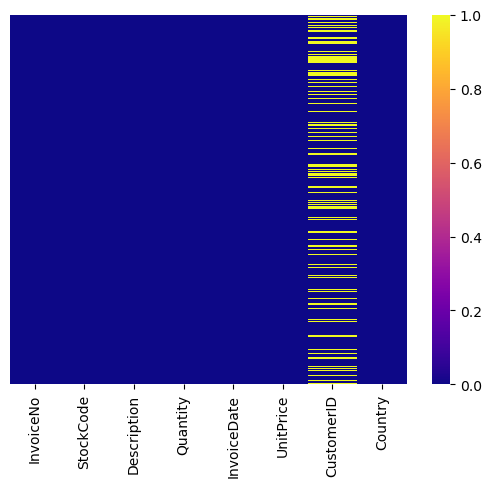

Conclusion:

	The number of null values in column Description is: 1454
					with percentage of: 0.3%

	The number of null values in column CustomerID is: 135080
					with percentage of:  24.9%


In [18]:
print(f'Summary of number of missing values in the dataset:\n{retail_df.isnull().sum()}')
sns.heatmap(retail_df.isnull(), yticklabels=False, cbar=True, cmap='plasma')
plt.show()

number_of_null_Description = retail_df.Description.isnull().sum()
number_of_null_CustomerID = retail_df.CustomerID.isnull().sum()
total_entries = len(retail_df.axes[0])
print(f'Conclusion:\n\n'
      f'\tThe number of null values in column Description is: {number_of_null_Description}\n'
      f'\t\t\t\t\twith percentage of: {(round(number_of_null_Description/total_entries,3)*100)}%\n'
      f'\n\tThe number of null values in column CustomerID is: {number_of_null_CustomerID}\n'
      f'\t\t\t\t\twith percentage of:  {(round(number_of_null_CustomerID/total_entries,3)*100)}%'
        )

### Explore the null values, apply reasonable modification. 

In [21]:
# Identify and examine entries where the description is null, modify dataset accordingly.

print(retail_df[retail_df.Description.isnull()] .sample(5))

print('\nComment:\n\tAll the unit price is 0 where description is null.')
print('\tUnit Price cannot be 0, these are invalid inputs.')

number_of_invalid_UnitPrice_input = len(retail_df[retail_df.UnitPrice == 0])
print(f'\n\tThere are {number_of_invalid_UnitPrice_input} invalid price input.\n'
      f'\tThe percentage of this invalid input is: {(round(number_of_invalid_UnitPrice_input / total_entries, 3)) * 100}%')

# Remove invalid price inputs from the dataset. 
retail_df=retail_df[retail_df.UnitPrice!=0]
print('\n\tInvalid price inputs have been removed from the dataset.')

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
341601    566768     16045         NaN     -3667 2011-09-14 17:53:00   
23804     538249     85084         NaN        25 2010-12-10 12:19:00   
150601    549462    84910A         NaN       -16 2011-04-08 14:21:00   
320577    565043     22171         NaN         8 2011-08-31 17:01:00   
42499     539995     85064         NaN       -12 2011-01-04 10:12:00   

        UnitPrice  CustomerID         Country  
341601        0.0         NaN  United Kingdom  
23804         0.0         NaN  United Kingdom  
150601        0.0         NaN  United Kingdom  
320577        0.0         NaN  United Kingdom  
42499         0.0         NaN  United Kingdom  

Comment:
	All the unit price is 0 where description is null.
	Unit Price cannot be 0, these are invalid inputs.

	There are 2515 invalid price input.
	The percentage of this invalid input is: 0.5%

	Invalid price inputs have been removed from the dataset.


In [23]:
# Identify and examine entries where the CustomerID is null, modify dataset accordingly.

print(retail_df[retail_df.CustomerID.isnull()].sample(3))

print('\nComment:\n'
        '\tAll the null value CustomerID has complete entries for the rest of the columns.\n'
        '\tProviding these business is of wholesale nature, this might be the case that the purchase is too small.\n'
        '\tThese null values need to be kept, and will be replaced with empty string below.\n'
     )

       InvoiceNo StockCode                       Description  Quantity  \
396218    571061     21216  SET 3 RETROSPOT TEA,COFFEE,SUGAR         2   
266155    560245     84879     ASSORTED COLOUR BIRD ORNAMENT        10   
34862     539434     21231    SWEETHEART CERAMIC TRINKET BOX         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
396218 2011-10-13 14:33:00      10.79         NaN  United Kingdom  
266155 2011-07-17 12:15:00       1.69         NaN     Switzerland  
34862  2010-12-17 14:41:00       2.51         NaN  United Kingdom  

Comment:
	All the null value CustomerID has complete entries for the rest of the columns.
	Providing these business is of wholesale nature, this might be the case that the purchase is too small.
	These null values need to be kept, and will be replaced with empty string below.



### Remove duplicates

In [26]:
# Find duplicateds in the dataset.

print(f'The numberof duplicated rows found in the dataset is: \n {retail_df.duplicated().sum()}')
print(f'The total number of rows and colums for the dataset before dropping duplicates is: \n {retail_df.shape}')

# Remove duplicates from the dataset.

retail_df=retail_df.drop_duplicates()
print(f'The total number of rows and colums for the dataset after dropping duplicates becomes: \n {retail_df.shape}')

The numberof duplicated rows found in the dataset is: 
 5263
The total number of rows and colums for the dataset before dropping duplicates is: 
 (539394, 8)
The total number of rows and colums for the dataset after dropping duplicates becomes: 
 (534131, 8)


### Explore the dataset comprehensively by generating summary statistics.

In [29]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,534131.000000,534131,534131.000000,401564.000000
mean,9.916784,2011-07-04 12:02:14.286607360,4.654426,15281.266797
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13939.000000
50%,3.000000,2011-07-19 15:55:00,2.100000,15145.000000
75%,10.000000,2011-10-18 17:10:00,4.130000,16788.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,216.451709,NaN,97.460790,1713.978947


## Further Data Exploration and Cleaning

### Change data types

In [33]:
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('string')
retail_df['StockCode'] = retail_df['StockCode'].astype('string')
retail_df['Description'] = retail_df['Description'].astype('string')
retail_df['CustomerID'] = retail_df['CustomerID'].fillna(0).astype(int) # change to integer first to drop the decimal points.
retail_df['CustomerID'] = retail_df['CustomerID'].astype('string')
retail_df['Country'] = retail_df['Country'].astype('string')
retail_df['InvoiceDate'] = retail_df['InvoiceDate'].dt.date
retail_df.dtypes

InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate            object
UnitPrice             float64
CustomerID     string[python]
Country        string[python]
dtype: object

### Column cleanup

In [36]:
retail_df.rename(columns={
        'InvoiceNo':'Invoice_No',
        'StockCode':'Stock_Code',
        'InvoiceDate':'Invoice_Date',
        'UnitPrice':'Unit_Price',
        'CustomerID':'Customer_ID',
    }, inplace=True)

retail_df.columns=[col.lower() for col in retail_df]

retail_df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

# Further Data Cleaning and Initial Analysis

## Employ a for loop to iterate through 'unit_price', calculating the sum and average of its values. 

In [40]:
unit_price=retail_df.unit_price

total=0
count=0
for x in unit_price:
    total=total+x
    count+=1
print(f'The sum of unit price is: {round(total,2)}, and the average is: {round(total/count,2)}')


The sum of unit price is: 2486072.97, and the average is: 4.65


## Utilise another loop to iterate through 'description', converting all values to lowercase for consistency.

In [43]:
lower_case=[]
description=retail_df.description
for x in description:
    x=x.lower()
    lower_case.append(x)

retail_df.description=lower_case
retail_df.description.sample(3)

20082     set of 9 heart shaped balloons
98180             party invites woodland
265354                   pink party bags
Name: description, dtype: object

## Explore 'invoice_no' and 'stock_no' & Conduct Data Cleaning Accordingly

In [46]:
# write a function that detects any non-numerical characters in chosen columns

numbers=['0','1','2','3','4','5','6','7','8','9']


def detect_non_number(column_name):
    non_number=set()
    for string in column_name:
        for x in string:
            if x not in numbers:
                non_number.add(x)
    return non_number

In [48]:
# detect any non-numerical characters in 'invoice_no'
print('The non-number characters detected from invoice_no column is:')    
a=detect_non_number(retail_df['invoice_no'])  
print(a)

# detect any non-numerical characters in 'stock_code'
print('The non-number characters detected from stock_code column is:')    
x=detect_non_number(retail_df['stock_code'])
print(x)

# Convert 'invoice_no' to lowercase to facilitate analysis.
# leave 'stock_code', as upper case and lower case may carry different meaning.

retail_df.loc[:,'invoice_no']=retail_df.invoice_no.str.lower()


The non-number characters detected from invoice_no column is:
{'C', 'A'}
The non-number characters detected from stock_code column is:
{'K', '_', 't', ' ', 'D', 'C', 'Z', 'T', 'W', 'B', 'J', 'M', 'm', 'F', 'H', 'p', 'k', 'd', 'f', 'P', 'S', 'O', 'I', 'b', 'L', 'A', 'U', 'V', 'n', 'e', 'l', 'R', 'N', 'g', 's', 'G', 'c', 'Y', 'E', 'a', 'i'}


In [49]:
# Explore invoice numbers with 'c' 

invoice_no_contains_c=len(retail_df[retail_df.invoice_no.str.contains('c')])
invoice_no_startswith_c=len(retail_df[retail_df.invoice_no.str.startswith('c')])

print(f'The number of invoices that contains \'c\' is {invoice_no_contains_c}\n'
      f'The number of invoices that starts with \'c\' is {invoice_no_startswith_c}\n'
    f'\nThe above matches confirm that any invoice number containing \'c\' is consistent.')


The number of invoices that contains 'c' is 9251
The number of invoices that starts with 'c' is 9251

The above matches confirm that any invoice number containing 'c' is consistent.


In [52]:
# Explore invoice numbers with 'a' 

retail_df[retail_df.invoice_no.str.contains('a')]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299982,a563185,B,adjust bad debt,1,2011-08-12,11062.06,0,United Kingdom
299983,a563186,B,adjust bad debt,1,2011-08-12,-11062.06,0,United Kingdom
299984,a563187,B,adjust bad debt,1,2011-08-12,-11062.06,0,United Kingdom


In [54]:
# The invoice numbers with 'a' are entris for adjusting bad debt, drop them.

retail_df=retail_df[~retail_df.invoice_no.str.contains('a')]
print(f'Now, the non-numerical character left in invoice numbers is:')
detect_non_number(retail_df['invoice_no'])

Now, the non-numerical character left in invoice numbers is:


{'c'}

## Explore 'unit_price' & Conduct Data Cleaning Accordingly

In [57]:
retail_df.unit_price.describe()

count    534128.000000
mean          4.675162
std          93.867789
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64

In [59]:
# Investigate price outliers.

retail_df[retail_df.unit_price==38970.000000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
222681,c556445,M,manual,-1,2011-06-10,38970.0,15098,United Kingdom


In [61]:
print(retail_df[retail_df.customer_id=='15098']) 

print('\nComment:\n'
    '\tThis customer placed three orders on 10/06/2011, and cancelled two of them immediately afterward.' 
    '\n\tThese contradictory entries need to be deleted.'
     )

       invoice_no stock_code                     description  quantity  \
222670     556442      22502      picnic basket wicker small        60   
222680     556444      22502  picnic basket wicker 60 pieces        60   
222681    c556445          M                          manual        -1   
222682     556446      22502  picnic basket wicker 60 pieces         1   
222692    c556448      22502      picnic basket wicker small       -60   

       invoice_date  unit_price customer_id         country  
222670   2011-06-10        4.95       15098  United Kingdom  
222680   2011-06-10      649.50       15098  United Kingdom  
222681   2011-06-10    38970.00       15098  United Kingdom  
222682   2011-06-10      649.50       15098  United Kingdom  
222692   2011-06-10        4.95       15098  United Kingdom  

Comment:
	This customer placed three orders on 10/06/2011, and cancelled two of them immediately afterward.
	These contradictory entries need to be deleted.


In [63]:
# Drop specific rows from the DataFrame using their index
retail_df = retail_df.drop(index=[222670, 222692, 222680, 222681])

# Confirm only the valid entries are kept. 
retail_df[retail_df.customer_id == '15098']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
222682,556446,22502,picnic basket wicker 60 pieces,1,2011-06-10,649.5,15098,United Kingdom


In [65]:
# The above outlier is a cancellation item with stock_code 'M'. Check if there are more similar items in the dataframe.

test=retail_df[retail_df.invoice_no.str.contains('c') & retail_df.stock_code.str.contains('M')].sample(3)
print(test)

# Extract unique stock codes where invoice_no contains 'c' and stock_code contains 'M'.
x=retail_df[retail_df.invoice_no.str.contains('c') & retail_df.stock_code.str.contains('M')].stock_code.unique()
print("\nStock Codes where invoice_no contains 'c' and stock_code contains 'M' are:", x)

print('\nComment:'
     '\n\tThere are more contradictory entries in the dataset.'
     )

       invoice_no stock_code description  quantity invoice_date  unit_price  \
201575    c554308          M      manual        -1   2011-05-23      557.72   
140691    c548454          M      manual        -1   2011-03-31        5.70   
414325    c572450          M      manual        -1   2011-10-24      248.87   

       customer_id         country  
201575       12757        Portugal  
140691       16422  United Kingdom  
414325           0  United Kingdom  

Stock Codes where invoice_no contains 'c' and stock_code contains 'M' are: <StringArray>
['AMAZONFEE', 'M', '84800M', '46000M']
Length: 4, dtype: string

Comment:
	There are more contradictory entries in the dataset.


In [67]:
# Need to validate that invoice_no contains 'c' only refer to entries that are cancellation items.
# investigate stock_code and description where invoice_no contains 'c'.

overview=retail_df[retail_df.invoice_no.str.contains('c')].groupby(['stock_code','description'])['quantity'].sum()
print(overview.tail(10))

print('\nComment:'
     '\n\tinvoice_no contains \'c\' also refer to entries that are not cancellation items.'
     )

stock_code    description                      
90211B        jet black las vegas necklace 45cm      -2
AMAZONFEE     amazon fee                            -32
BANK CHARGES  bank charges                          -25
C2            carriage                               -2
CRUK          cruk commission                       -16
D             discount                            -1194
DOT           dotcom postage                         -1
M             manual                              -4065
POST          postage                              -147
S             samples                               -60
Name: quantity, dtype: int64

Comment:
	invoice_no contains 'c' also refer to entries that are not cancellation items.


## Key Observations:
#### 1. Some cancelled orders share the same stock code and description with the corresponding entries, and the quantities are opposites.
#### 2. Some cancelled orders have corresponding entries marked with 'M' for stock_code, and the quantities and descriptions do not match the corresponding entries.
#### 3. Entries with invoice_no containing 'c' are not only cancelled orders but also include various fees and sample costs.
### Comment:
#### Due to the complexity of the above observations and the size of the dataset, it is neither efficient nor accurate to remove all the contradictory entries.
#### The dataset will be split into two parts: one with invoices containing 'c' and the other without. Exploration and analysis will be conducted for each of them.


In [70]:
# Create new column 'total_sales'
# Make two copies of dataframe, one with invoice_no contains 'c', the other one not with 'c'


retail_df=retail_df.assign(total_sales=retail_df.quantity*retail_df.unit_price)

mask = retail_df.invoice_no.str.startswith('c')

df_with_c = retail_df[mask].copy()
df_without_c= retail_df[~mask].copy()

## Data exploration, cleaning, and analysis for the dataset with invoices that do not contain 'c'.

Summary Statistic for Unit Price:

count    524875.000000
mean          3.900273
std          32.694721
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: unit_price, dtype: float64


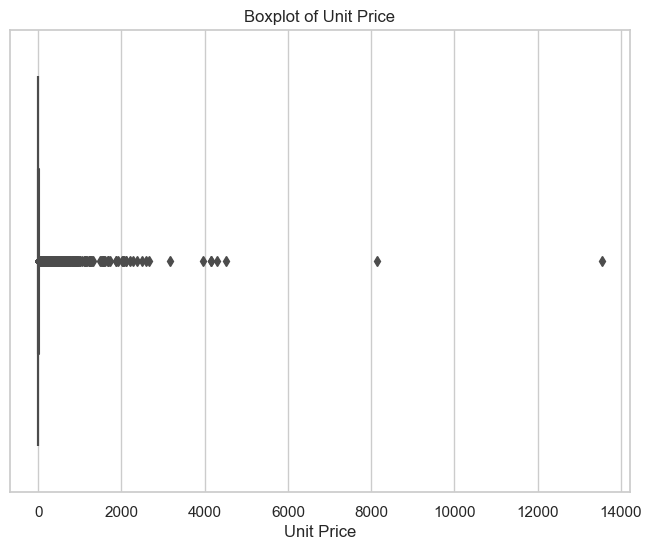

In [73]:
# Define a function to plot a box plot for a specific column.
def plot_box(df, column_name):
    sns.set(style='whitegrid')
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column_name]) 
    plt.title('Boxplot of Unit Price')
    plt.xlabel('Unit Price')
    plt.show()
    
print(f'Summary Statistic for Unit Price:\n\n{df_without_c.unit_price.describe()}')
plot_box(df_without_c, 'unit_price')

In [75]:
# investigate the outliers
outliers=df_without_c[df_without_c.unit_price>=3000]
print(outliers)
print('\nComment:'
      '\n\tAccording to the stock_code and description, these outliers should not belong to df_without_c dataframe.'
      '\n\tThey should belong to df_with_c'
        )

       invoice_no stock_code     description  quantity invoice_date  \
15017      537632  AMAZONFEE      amazon fee         1   2010-12-07   
173382     551697       POST         postage         1   2011-05-03   
268028     560373          M          manual         1   2011-07-18   
297723     562955        DOT  dotcom postage         1   2011-08-11   
374542     569382          M          manual         1   2011-10-03   
406406     571751          M          manual         1   2011-10-19   
422351     573077          M          manual         1   2011-10-27   
422376     573080          M          manual         1   2011-10-27   

        unit_price customer_id         country  total_sales  
15017     13541.33           0  United Kingdom     13541.33  
173382     8142.75       16029  United Kingdom      8142.75  
268028     4287.63           0  United Kingdom      4287.63  
297723     4505.17           0  United Kingdom      4505.17  
374542     3155.95       15502  United Kingdom    

## Find all the misplaced rows, delete them from df_without_c, and concatenate them back to df_with_c.

In [78]:
# list the possible misplaced Stock Codes

possible_misplaced_stockcode = df_with_c.groupby(['stock_code','description'])['quantity'].sum().tail(9).index.get_level_values('stock_code').tolist()
print(f'The possible misplaced Stock Code include:\n{possible_misplaced_stockcode}')


# make a copy of misplaced rows, and add the missing 'c' to the invoice_no
misplaced=df_without_c[df_without_c.stock_code.isin(possible_misplaced_stockcode)].copy()
misplaced['invoice_no'] = 'c' + misplaced['invoice_no']

# make appropriate modifications as needed
misplaced['quantity']=misplaced['quantity'].mul(-1)
misplaced['total_sales']=misplaced['total_sales'].mul(-1)
print('\n', misplaced.sample(2))

# concatenate misplaced rows back to df_with_c
df_with_c=pd.concat([df_with_c, misplaced])

# delete misplaced rows from df_without_c
df_without_c=df_without_c[~df_without_c.stock_code.isin(possible_misplaced_stockcode)]

The possible misplaced Stock Code include:
['AMAZONFEE', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'POST', 'S']

        invoice_no stock_code     description  quantity invoice_date  \
347478    c567305       POST         postage        -2   2011-09-19   
62106     c541496        DOT  dotcom postage        -1   2011-01-18   

        unit_price customer_id         country  total_sales  
347478        18.0       12621         Germany        -36.0  
62106        101.0           0  United Kingdom       -101.0  


Summary Statistic for Unit Price now become:


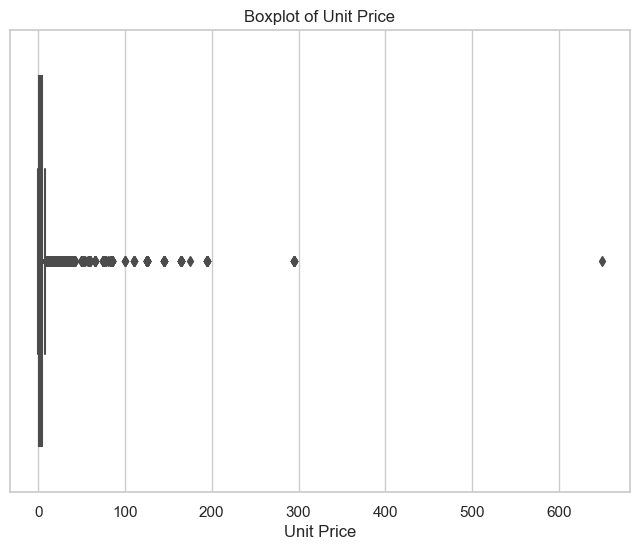

In [80]:
print(f'Summary Statistic for Unit Price now become:')
plot_box(df_without_c, 'unit_price')

In [82]:
# Check the legitimacy of the outliers.

x=df_without_c[df_without_c.unit_price>=200]
print(x.sample(3))
print('\nComment:'
      '\n\tAll outliers in the dataframe are valid.'
        )

       invoice_no stock_code                   description  quantity  \
133994     547814      22656  vintage blue kitchen cabinet         1   
82768      543253      22655   vintage red kitchen cabinet         1   
118769     546480      22656  vintage blue kitchen cabinet         1   

       invoice_date  unit_price customer_id         country  total_sales  
133994   2011-03-25       295.0       13452  United Kingdom        295.0  
82768    2011-02-04       295.0       14842  United Kingdom        295.0  
118769   2011-03-14       295.0       13452  United Kingdom        295.0  

Comment:
	All outliers in the dataframe are valid.


# Further Analysis and Data Visualization

## Analysis and Data Visualization for Dataframe df_without_c

### Examine the total sales trends over time and the correlation relationships between numerical columns.

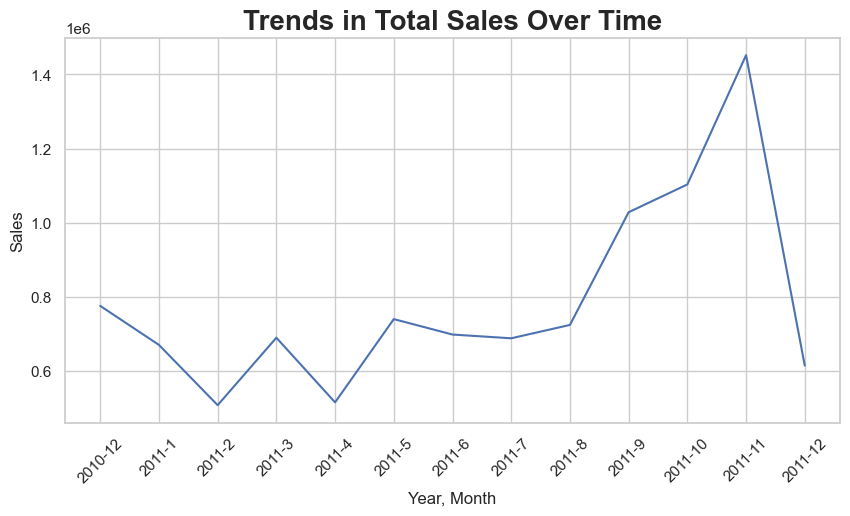

In [87]:
# Convert 'invoice_date' to datetime type
df_without_c['invoice_date'] = pd.to_datetime(df_without_c['invoice_date'])

# Extract year and month from 'invoice_date' and create new columns
df_without_c['year'] = df_without_c['invoice_date'].dt.year
df_without_c['month'] = df_without_c['invoice_date'].dt.month

groupby_month = df_without_c.groupby(['year', 'month'])['total_sales'].sum()
fig = plt.figure(figsize=(10, 5))
groupby_month.plot(kind='line')
plt.xlabel('Year, Month')
plt.ylabel('Sales')
plt.title('Trends in Total Sales Over Time', fontsize=20, fontweight='bold') 
plt.xticks(range(len(groupby_month)), [f'{year}-{month}' for (year, month) in groupby_month.index], rotation=45)
plt.show()

In [89]:
numerical_colums=df_without_c.select_dtypes(include=np.number).columns
corrtest=df_without_c[numerical_colums]
print(corrtest.corr())
print('\nComment:\nOnly sales and quantity show a strong correlation, and these two are naturally correlated. \nScatter plots and pair plots are not applicable for this dataset.')

             quantity  unit_price  total_sales      year     month
quantity     1.000000   -0.022708     0.934333  0.003505 -0.002319
unit_price  -0.022708    1.000000     0.021568 -0.037256 -0.013453
total_sales  0.934333    0.021568     1.000000  0.000590  0.000300
year         0.003505   -0.037256     0.000590  1.000000 -0.368921
month       -0.002319   -0.013453     0.000300 -0.368921  1.000000

Comment:
Only sales and quantity show a strong correlation, and these two are naturally correlated. 
Scatter plots and pair plots are not applicable for this dataset.


### Customer Segmentation Analysis by Region

In [92]:
# Modify the dataset for analytical purposes.

number_of_countries=len(df_without_c.country.unique())
print(f'The total number of countris is:\n\t\t\t>>> {number_of_countries}'
        '\nCountries with small contributions are grouped as \'Other Country\' for visualisation purpose.'
     )

df_without_c_copy=df_without_c.copy()
top_countries = df_without_c_copy['country'].value_counts(normalize=True).nlargest(4).index
df_without_c_copy.loc[~df_without_c_copy['country'].isin(top_countries), 'country'] = 'Other Countries'

df_without_c_copy=df_without_c.copy()
top_countries = df_without_c_copy['country'].value_counts(normalize=True).nlargest(4).index
df_without_c_copy.loc[~df_without_c_copy['country'].isin(top_countries), 'country'] = 'Other Countries'

The total number of countris is:
			>>> 38
Countries with small contributions are grouped as 'Other Country' for visualisation purpose.


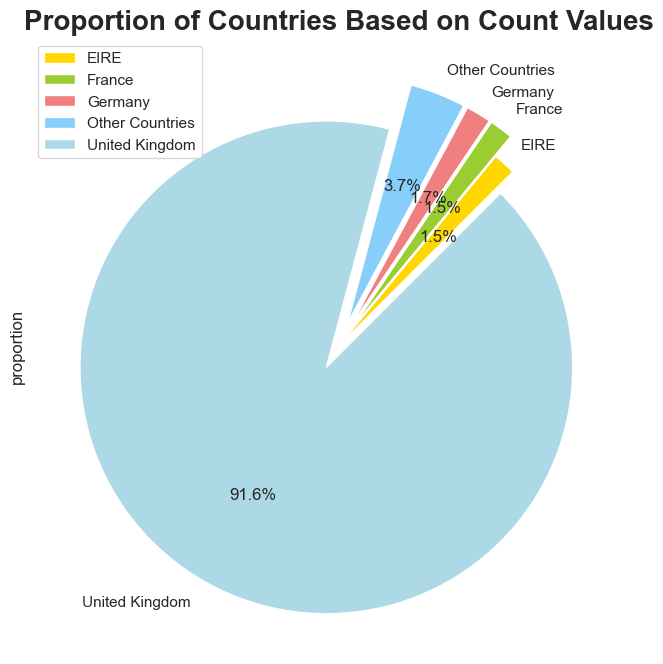

In [94]:
explode=(0,0.1,0.1,0.1,0.1)
fig = plt.figure(figsize=(8, 8))
colors = ['gold','yellowgreen', 'lightcoral', 'lightskyblue', 'Lightblue']
df_without_c_copy['country'].value_counts(normalize=True).sort_values().plot(kind='pie', autopct='%0.1f%%', startangle=45, explode=explode, colors=colors)
plt.legend()
plt.title('Proportion of Countries Based on Count Values',fontsize=20,fontweight='bold')
plt.show()

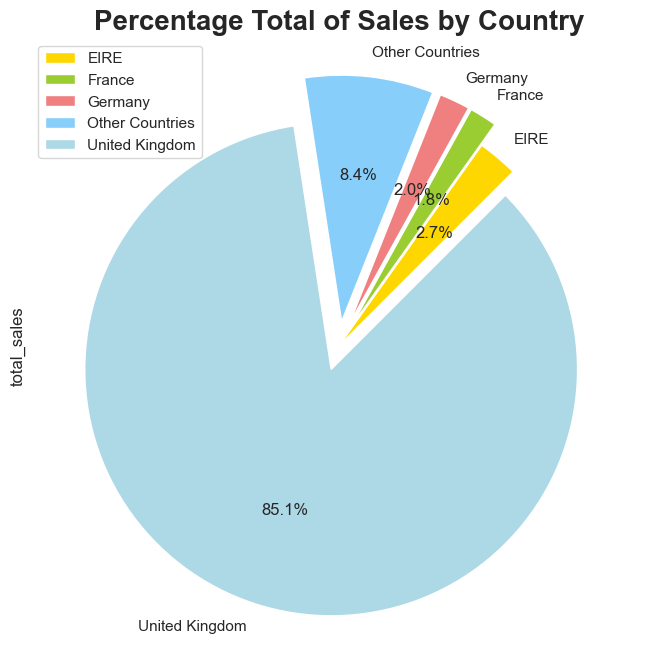

In [96]:
explode=(0,0.1,0.1,0.1,0.1)
fig = plt.figure(figsize=(8, 8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'Lightblue']
df_without_c_copy.groupby(['country'])['total_sales'].sum().plot(kind='pie', autopct='%0.1f%%', startangle=45, explode=explode, colors=colors)
plt.legend()
plt.title('Percentage Total of Sales by Country',fontsize=20,fontweight='bold')
plt.show()

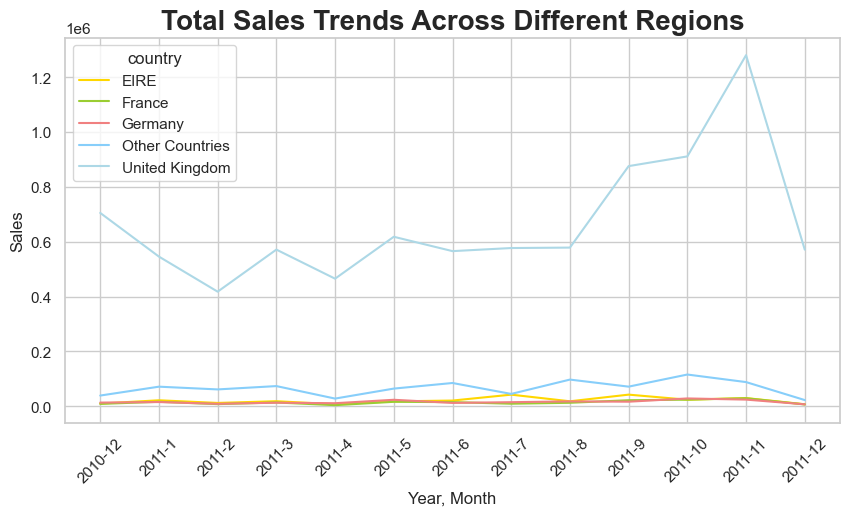

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'Lightblue']
df_without_c_copy.groupby(['country','year', 'month' ])['total_sales'].sum().unstack('country').plot.line(ax=ax, color=colors)
plt.xlabel('Year, Month')
plt.ylabel('Sales')
plt.xticks(range(len(groupby_month)), [f'{year}-{month}' for (year, month) in groupby_month.index], rotation=45)
plt.title('Total Sales Trends Across Different Regions',fontsize=20,fontweight='bold')
plt.show()

### Product Segmentation Analysis by Price Range

Summary Statistics of Unit Price:

count    522570.000000
mean          3.273808
std           4.304213
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: unit_price, dtype: float64


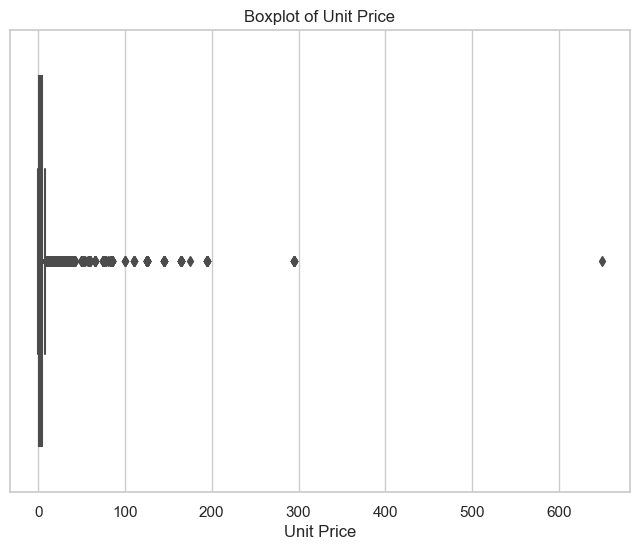

In [101]:
df_without_c_p = df_without_c.copy()
print(f'Summary Statistics of Unit Price:\n')
print(df_without_c.unit_price.describe())

plot_box(df_without_c_p, 'unit_price')

In [103]:
# Divide all products into different price ranges according to the above statistics.

def assign_price_range(price):
    if price >= 100:
        return '1st: >100'
    elif 50 <= price < 100:
        return '2nd: 50-100'
    elif 20 <= price < 50:
        return '3rd: 20-50'
    elif 10 <= price < 20:
        return '4th: 10-20'
    elif 5 <= price < 10:
        return '5th: 5-10'
    elif 3 <= price < 5:
        return '7th: 3-5'
    else:
        return '8th: <3'

df_without_c_p['price_range'] = df_without_c_p['unit_price'].apply(assign_price_range)

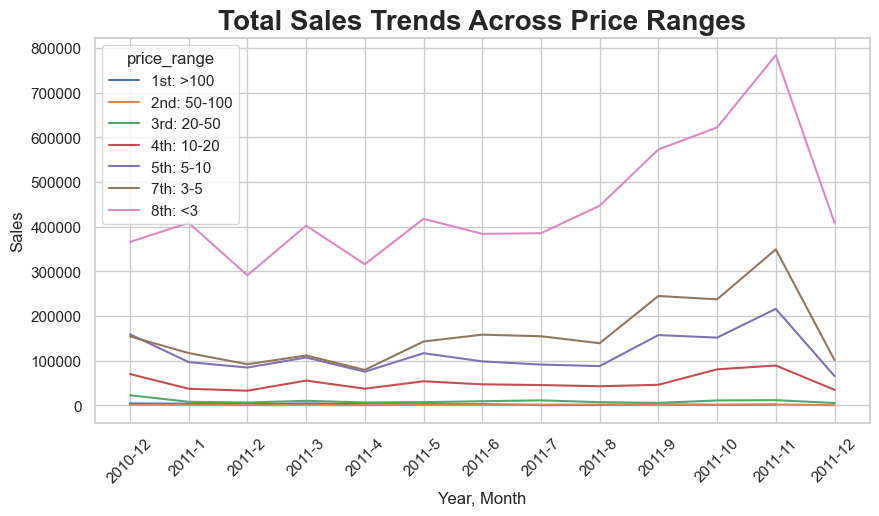

In [105]:
df_without_c_p.groupby(['price_range', 'year', 'month'])['total_sales'].sum().unstack('price_range').plot.line(figsize=(10, 5))
plt.xlabel('Year, Month')
plt.ylabel('Sales')
plt.xticks(range(len(groupby_month)), [f'{year}-{month}' for (year, month) in groupby_month.index], rotation=45)
plt.title('Total Sales Trends Across Price Ranges',fontsize=20,fontweight='bold')
plt.show()

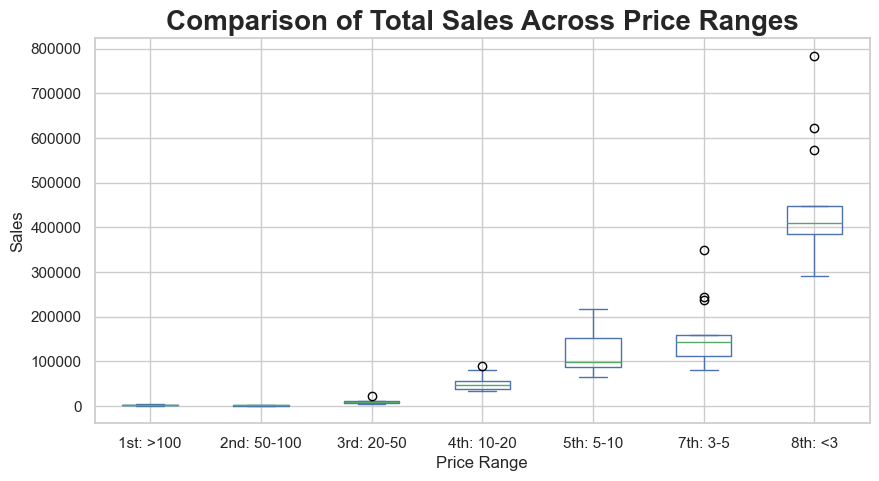

In [107]:
df_without_c_p.groupby(['price_range', 'year', 'month'])['total_sales'].sum().unstack('price_range').plot.box(figsize=(10, 5))
plt.xlabel('Price Range')
plt.ylabel('Sales')
plt.title('Comparison of Total Sales Across Price Ranges',fontsize=20,fontweight='bold')
plt.show()

## Analysis and Data Visualization for Dataframe df_with_c

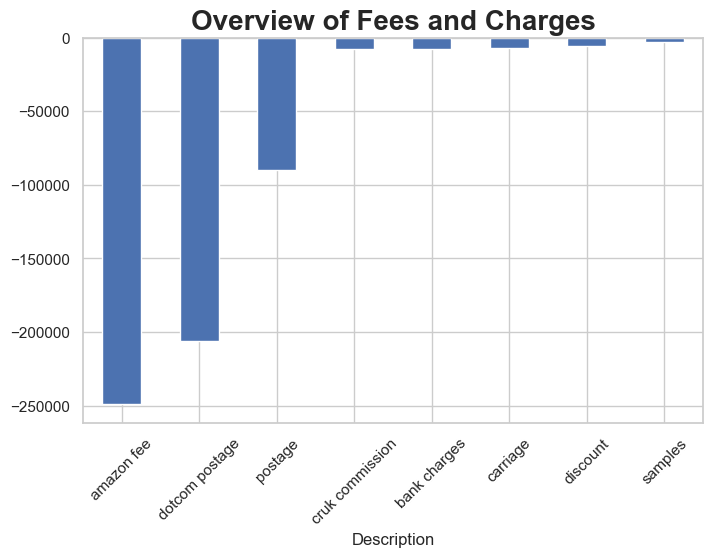

In [110]:
fees_and_charges=df_with_c.groupby(['stock_code','description'])['quantity'].sum().tail(9).index.get_level_values('stock_code').tolist()
fees_and_charges.remove('M')

df_fees_and_charges=df_with_c[df_with_c.stock_code.isin(fees_and_charges)]

bar_chart=df_fees_and_charges.groupby(['stock_code'])['total_sales'].sum().sort_values().plot(kind='bar', figsize=(8, 5))
custom_labels = ['amazon fee', 'dotcom postage', 'postage', 'cruk commission', 'bank charges', 'carriage', 'discount', 'samples']  
bar_chart.set_xticklabels(custom_labels, rotation=45)
plt.xlabel('Description')
plt.title('Overview of Fees and Charges',fontsize=20,fontweight='bold')

plt.show()

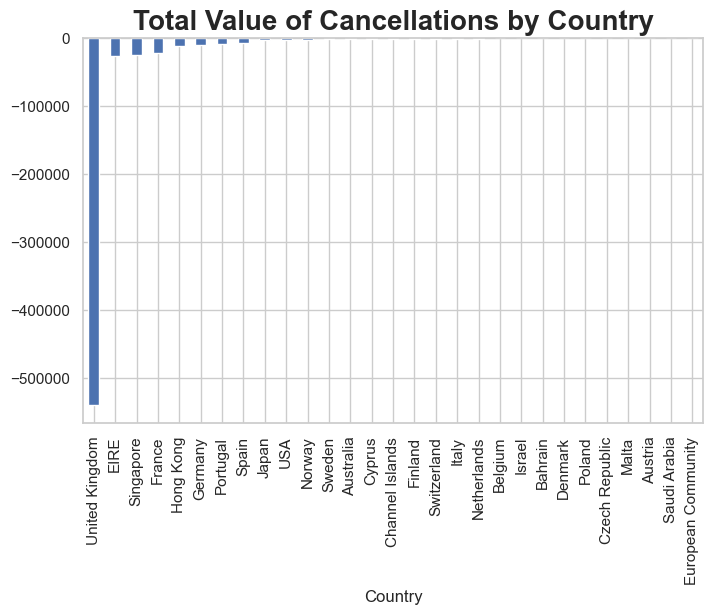

In [112]:
df_canceled = df_with_c[~df_with_c.stock_code.isin(fees_and_charges)]
df_canceled.groupby(['country'])['total_sales'].sum().sort_values().plot(kind='bar', figsize=(8, 5))
plt.xlabel('Country')
plt.title('Total Value of Cancellations by Country', fontsize=20, fontweight='bold')  
plt.show()

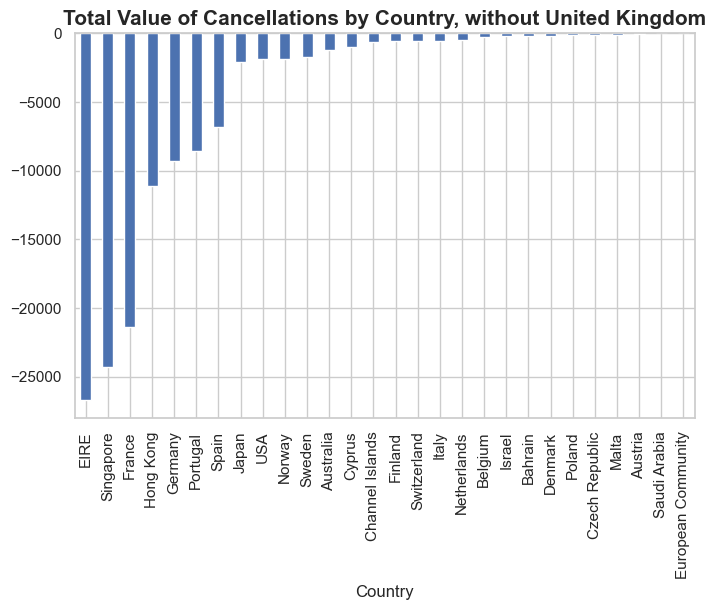

In [114]:
df_canceled=df_with_c[~df_with_c.stock_code.isin(fees_and_charges)]

df_canceled[df_canceled['country']!='United Kingdom'].groupby(['country'])['total_sales'].sum().sort_values().plot(kind='bar',figsize=(8, 5))
plt.xlabel('Country')
plt.title('Total Value of Cancellations by Country, without United Kingdom',fontsize=15,fontweight='bold')
plt.show()